In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input parameters
START_PRICE  = 1500    # Starting price
STEP_PRICE   = 1500     # Price to increase in each row
END_PRICE    = 50000  # Price at the end of the table
ORDERS       = 30      #

In [3]:
def thai_withholding_tax(price):
    return price*0.03

In [4]:
def fastwork_commission(price):
    # Tier 1
    tier1 = min(price,10000) * 0.17
    # Tier 2
    tier2 = min(max(0,price-10000) * 0.12,4800)
    # Tier 3
    tier3 = max(0,price-50000) * 0.07
    
    return tier1+tier2+tier3

In [5]:
def total_cost(price):
    return thai_withholding_tax(price) + fastwork_commission(price)

In [6]:
price_matrix = [[i,j] for i in range(START_PRICE,END_PRICE,STEP_PRICE) for j in range(1,ORDERS)]

In [7]:
# print(price_matrix)

In [8]:
df = pd.DataFrame(price_matrix, columns=['Price','Orders'])

In [9]:
# df['Fastwork_Fee'] = df['Price'].apply(fastwork_commission)

In [10]:
# df['Tax'] = df['Price'].apply(thai_withholding_tax)

In [11]:
df['Total_Price'] = df['Price'] * df['Orders']

In [12]:
df['Cost_Multiple'] = df['Price'].apply(total_cost) * df['Orders']

In [13]:
df['Cost_Single'] = df['Total_Price'].apply(total_cost)

In [14]:
df['Cost_Diff'] = df['Cost_Multiple'] - df['Cost_Single']

In [15]:
df['Cost_Diff%'] = (df['Cost_Diff']/df['Total_Price'])

In [16]:
df_pivot = pd.pivot_table(df,values='Cost_Diff%',index=['Price'],columns=['Orders'])

In [17]:
#print(df_pivot)

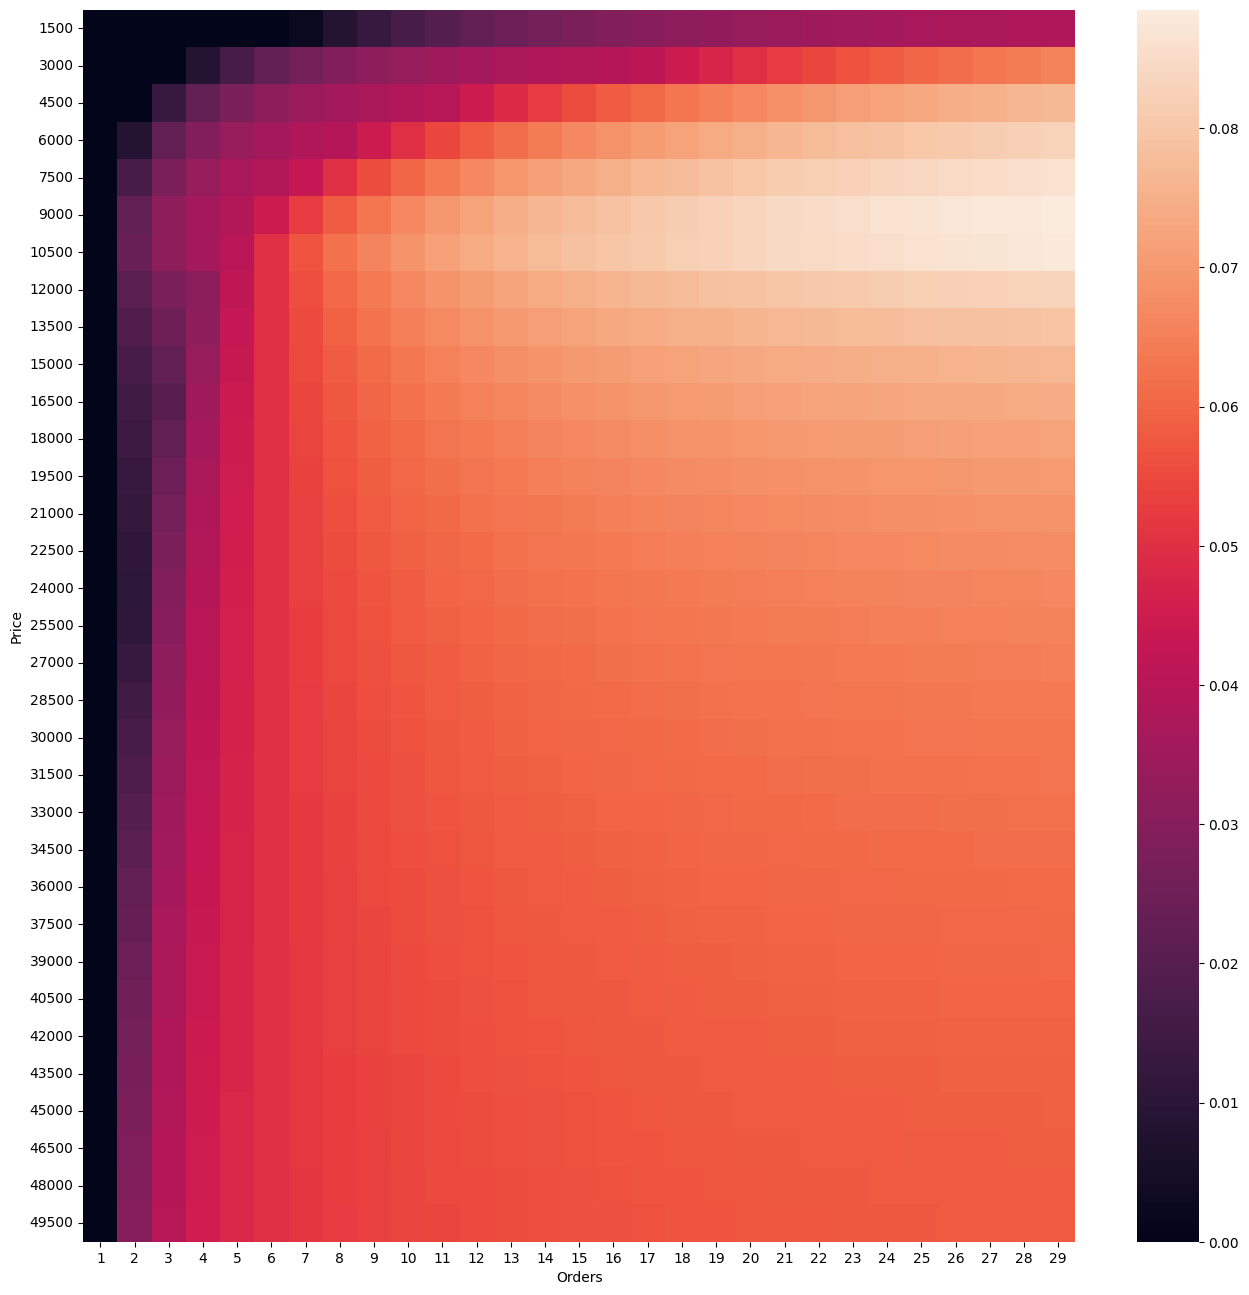

In [18]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_pivot,annot=False,fmt="%")
plt.savefig('heatmap_1500.png')